In [1]:
import numpy as np
import networkx as nx
import random as random
import matplotlib.pyplot as plt

# Abstract

This work aims to find the 'best fit' model for a given Facebook network (available at https://snap.stanford.edu/data/ego-Facebook.html). Through analysis of the Erdős–Rényi model, Watts-Strogatz model, Barabási–Albert model, Mediation-Driven Attachement model, and UNKNOWN model, we determined that CHOICE model best models the Facebook network. Next, we 

# Overview of Random Networks

## Erdös-Rényi Model

## Watts-Strogatz Model

## Barabási-Albert Model

## Mediation-Driven Attachment Model

<function matplotlib.pyplot.show>

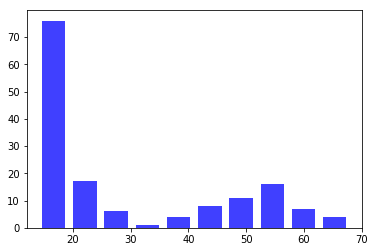

In [2]:
def MDA(n_init, m, n):
    A = np.triu(1 * (np.random.rand(n_init,n_init) < 0.6), 1)
    A = np.mat(A + A.T)
    G = nx.Graph(A)

    while len(G) != n:    
        ## Choose a random node to be mediator
        node_choice = random.randint(0,len(G)-1)
        
        ## Find its neighbours, then randomly choose m of them
        neighbours = [i for i in G.neighbors(node_choice)]
        neighbour_choices = random.sample(neighbours, m)
        
        ## Add m edges from new node to choices
        G.add_node(n_init)
        G.add_edges_from([(n_init,i) for i in neighbour_choices])
        n_init +=1
        
    return G
    
#nx.draw(MDA(50, 14, 100), node_size = 50, node_color = 'blue', alpha = 0.2, edge_color = 'green')
#plt.show()

vertex_degrees = list(dict(nx.degree(MDA(50,14,150))).values())
plt.hist(vertex_degrees, facecolor='blue', alpha=0.75, rwidth=0.75)
plt.grid(False)
plt.show


## UNKNOWN Model

# Loading Facebook into Python

In [5]:
B = np.loadtxt("facebook_combined.txt")
H = nx.Graph()
H.add_edges_from(B)

In [6]:
def print_network_chars(G):
    vertex_degrees = list(dict(nx.degree(G)).values())
    plt.hist(vertex_degrees, 
         bins = np.linspace(np.min(vertex_degrees),
                          1 + np.max(vertex_degrees), 20),
         facecolor='blue', alpha=0.75, rwidth = 0.9) 
    plt.title("Vertex degree distribution")
    plt.grid(True)
    plt.show()
    n = nx.number_of_nodes(G)
    m = nx.number_of_edges(G)
    CC = nx.average_clustering(G)
    print("|V| =", n)
    print("|E| =", m)
    print("Average degree is", 2 * m / n)
    print("CC =", CC)
    return None

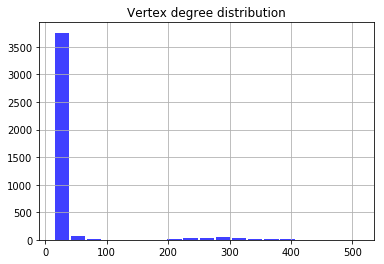

|V| = 4039
|E| = 65686
Average degree is 32.52587274077742
CC = 0.20162129408840185


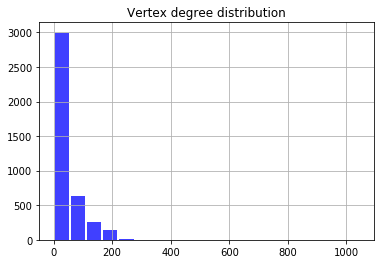

|V| = 4039
|E| = 88234
Average degree is 43.69101262688784
CC = 0.6055467186200876


In [9]:
print_network_chars(MDA(200,14,4039))
print_network_chars(H)